In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [187]:
data_train_path = 'dataset/train'
data_test_path = 'dataset/test'
data_val_path = 'dataset/validation'

In [188]:
img_width = 180
img_height =180 

In [189]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 8945 files belonging to 3 classes.


In [190]:
data_cat = data_train.class_names

In [191]:
data_cat

['tomatoes_fresh', 'tomatoes_fresh_medium', 'tomatoes_rotten']

In [192]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 3832 files belonging to 3 classes.


2024-05-07 16:52:41.363023: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


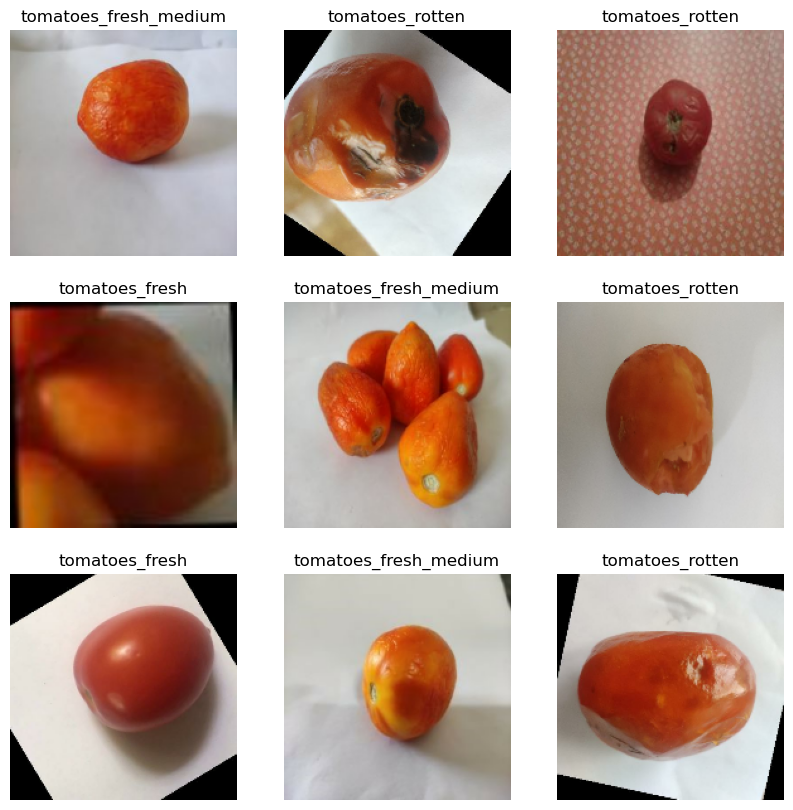

In [194]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [195]:
from tensorflow.keras.models import Sequential

In [196]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [197]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [198]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [199]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3,verbose=1)

In [200]:
epochs_size = 10
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size,callbacks=[early_stopping],verbose=1)

Epoch 1/10
110/280 ━━━━━━━━━━━━━━━━━━━━ 1:38 581ms/step - accuracy: 0.6157 - loss: 1.2032

2024-05-07 16:53:48.597549: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


212/280 ━━━━━━━━━━━━━━━━━━━━ 38s 564ms/step - accuracy: 0.6580 - loss: 0.9976

2024-05-07 16:54:44.329802: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


280/280 ━━━━━━━━━━━━━━━━━━━━ 174s 614ms/step - accuracy: 0.6753 - loss: 0.9249 - val_accuracy: 0.2904 - val_loss: 1.5987
Epoch 2/10
101/280 ━━━━━━━━━━━━━━━━━━━━ 1:36 538ms/step - accuracy: 0.8189 - loss: 0.4788

2024-05-07 16:56:30.927644: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


215/280 ━━━━━━━━━━━━━━━━━━━━ 35s 540ms/step - accuracy: 0.8258 - loss: 0.4626

2024-05-07 16:57:32.760372: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


280/280 ━━━━━━━━━━━━━━━━━━━━ 166s 593ms/step - accuracy: 0.8289 - loss: 0.4553 - val_accuracy: 0.4126 - val_loss: 1.3488
Epoch 3/10
 99/280 ━━━━━━━━━━━━━━━━━━━━ 1:38 546ms/step - accuracy: 0.8752 - loss: 0.3541

2024-05-07 16:59:16.820251: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


224/280 ━━━━━━━━━━━━━━━━━━━━ 30s 543ms/step - accuracy: 0.8774 - loss: 0.3518

2024-05-07 17:00:24.393596: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


280/280 ━━━━━━━━━━━━━━━━━━━━ 167s 595ms/step - accuracy: 0.8784 - loss: 0.3498 - val_accuracy: 0.4408 - val_loss: 1.4866
Epoch 4/10
100/280 ━━━━━━━━━━━━━━━━━━━━ 1:37 540ms/step - accuracy: 0.8914 - loss: 0.2928

2024-05-07 17:02:03.309227: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


217/280 ━━━━━━━━━━━━━━━━━━━━ 34s 540ms/step - accuracy: 0.8935 - loss: 0.2912

2024-05-07 17:03:06.478258: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


280/280 ━━━━━━━━━━━━━━━━━━━━ 166s 593ms/step - accuracy: 0.8946 - loss: 0.2886 - val_accuracy: 0.4468 - val_loss: 1.6894
Epoch 5/10
 94/280 ━━━━━━━━━━━━━━━━━━━━ 1:40 539ms/step - accuracy: 0.9184 - loss: 0.2531

2024-05-07 17:04:46.102744: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


212/280 ━━━━━━━━━━━━━━━━━━━━ 36s 541ms/step - accuracy: 0.9195 - loss: 0.2416

2024-05-07 17:05:49.952365: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


280/280 ━━━━━━━━━━━━━━━━━━━━ 166s 591ms/step - accuracy: 0.9201 - loss: 0.2375 - val_accuracy: 0.3985 - val_loss: 2.0484
Epoch 5: early stopping


In [225]:
model.save('model/tomatoes.keras')

# TEST

In [230]:
image = 'dataset/test/test_5.png'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [231]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [232]:
score = tf.nn.softmax(predict)
print("Accuracy of tomato types:")
for i, label in enumerate(data_cat):
    print(label, ":", round(score[0][i].numpy(),2))
predicted_label = data_cat[np.argmax(score)]    
print("Predicted label:", predicted_label)


Accuracy of tomato types:
tomatoes_fresh : 0.02
tomatoes_fresh_medium : 0.0
tomatoes_rotten : 0.98
Predicted label: tomatoes_rotten


In [233]:
print('The tomat in this image is a {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)))


The tomat in this image is a tomatoes_rotten with accuracy of 0.98
